In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

In [7]:
# deleting a column, reordering and then saving
import pandas as pd
import Utils.Reader as Reader

import scipy.sparse as sps
df = pd.read_csv(filepath_or_buffer='../data/rewatches.csv',
                         sep=",",
                         skiprows=1,
                         header=None,
                         dtype={0: int, 1: int,2: int},
                         engine='python')

Reader.df_col_normalize(df,2)
matrix_df=df.sort_values(by=[0,1])
matrix_df.to_csv('../output/out_2.csv', index=False)

In [1]:
# normalizing a column, reordering and then saving
import pandas as pd
import Utils.Reader as Reader

import scipy.sparse as sps
df = pd.read_csv(filepath_or_buffer='../data/rewatches.csv',
                 sep=",",
                 skiprows=1,
                 header=None,
                 dtype={0: int, 1: int,2: int},
                 engine='python')

df[2]= Reader.df_col_normalize(df,2)
df=df.sort_values(by=[0,1])
df.to_csv('../output/out_2.csv', index=False)

In [6]:
# normalizing a column with substitution, reordering and then saving
import pandas as pd
import Utils.Reader as Reader

import scipy.sparse as sps
matrix_df = pd.read_csv(filepath_or_buffer='../output/extended.csv',
                        sep=",",
                        skiprows=1,
                        header=None,
                        dtype={0: int, 1: int, 2: int},
                        engine='python')
matrix_df.columns = ["a","b","data"]
Reader.df_col_normalize(matrix_df,"data",{-1:-0.5,0:0.5})
matrix_df.head()

,a,b,data
0,0,0,-0.5
1,0,1,-0.5
2,0,2,-0.5
3,0,3,-0.5
4,0,4,-0.5


In [2]:
# 1 HOT ENCODER
import Utils.Reader as Reader
Reader.oneHotEncoder(name="Type", colsToDelete=["Data"],colstoOneHot=["Type"],dfPath='../data/data_ICM_length.csv')

In [17]:
# DF SPLITTER
import Utils.Reader as Reader
Reader.df_splitter("Rewatch",[0,1],dtype={0: int, 1: int},name="rewatches_split_",dfPath='../data/rewatches.csv',colstoDefine=["UserID","ItemID","Rewatch"])

In [ ]:
# DF PREPROCESSING MODE
# 1-> Displayed (counts times a given Item has been displayed(in impressions list) to the user
# 2-> Extended (adds an interaction (-1) if a User has an item in impression list
# 3-> Count rewatches of each User-Item pair
# 4-> Count all rewatches of each user
import Utils.Reader as Reader
Reader.read_train_csr(matrix_path="../data/interactions_and_impressions.csv",preprocess=5,saving=True)

In [1]:
import Utils.Reader as Reader
import pandas as pd
URM_all1=Reader.load_URM(matrix_format='..')
a=URM_all1["UserID"].unique()
list(a)

array([    0,     1,     2, ..., 41626, 41627, 41628])

In [10]:
import seaborn as sbs
import Utils.Reader as Reader

df=Reader.only_read_train_csr(matrix_format="..")
sbs.heatmap(df.isna(),cbar=False)
df.Data=df.Data.astype(int)
df.Data=df.Data==0
sbs.heatmap(df,cbar=False)

EvaluatorHoldout: Ignoring 94 ( 0.2%) Users that have less than 1 test interactions


# Evaluator data

In [10]:
from Utils.Evaluator import EvaluatorHoldout
import Utils.Reader as Reader

from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample
#URM_all=Reader.load_URM(values_to_replace={0.01:0.02})
URM_all=Reader.read_train_csr()
#URM_all=Reader.load_URM("../output/URM_2_mean.csv")
URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all ,train_percentage=0.80)
evaluator_validation=EvaluatorHoldout(URM_test,cutoff_list=[10])



EvaluatorHoldout: Ignoring 94 ( 0.2%) Users that have less than 1 test interactions


In [1]:
from Utils.Evaluator import EvaluatorHoldout
import Utils.Reader as Reader

from Data_manager.split_functions.split_train_validation_random_holdout import \
    split_train_in_two_percentage_global_sample_double
values_to_replace={0.01: 0.0,0.0:0.2}
#URM_all=Reader.load_URM(values_to_replace={0.01:0.02})
URM_all=Reader.read_train_csr(values_to_replace=values_to_replace)

#URM_all_new=Reader.load_URM("../output/out_10.csv",values_to_replace={0.01: 0.0})
URM_all_new=Reader.load_URM("../output/out_10.csv",values_to_replace=values_to_replace)

#URM_all=Reader.load_URM("../output/URM_2_mean.csv")
URM_train, URM_test,URM_train2 = split_train_in_two_percentage_global_sample_double(URM_all ,URM_all_new,train_percentage=0.80)
evaluator_validation=EvaluatorHoldout(URM_test,cutoff_list=[10])

Unique UserID in the URM are 41629
Unique UserID in the URM and ICM are 41629
5826506
EvaluatorHoldout: Ignoring 323 ( 0.8%) Users that have less than 1 test interactions


# Stacker

In [9]:
import Utils.Reader as Reader
ICM_path='../data/rewatches.csv'

ICM_all = Reader.load_ICM_rewatches(ICM_path)

ICM_combined = Reader.combine(ICM=ICM_all, URM = URM_all)
ICM_combined

<24507x83258 sparse matrix of type '<class 'numpy.float64'>'
	with 3980440 stored elements in Compressed Sparse Row format>

# Recommenders

In [2]:
#1
# BEST MODEL UNTIL NOW _ PROVA
from Recommenders.Hybrid.ItemUserHybridKNNRecommender import ItemUserHybridKNNRecommender

recommender_ItemKNNCFCBF = ItemUserHybridKNNRecommender(URM_train2)
recommender_ItemKNNCFCBF.fit()

result_df, _ = evaluator_validation.evaluateRecommender(recommender_ItemKNNCFCBF)
result_df

ItemUserHybridKNNRecommender: URM Detected 22011 (52.9%) users with no interactions.
ItemKNNCFRecommender: URM Detected 22011 (52.9%) users with no interactions.
UserKNNCFRecommender: URM Detected 22011 (52.9%) users with no interactions.
Similarity column 24507 (100.0%), 1902.80 column/sec. Elapsed time 12.88 sec
Similarity column 41629 (100.0%), 2364.87 column/sec. Elapsed time 17.60 sec
[[ 0.07910257  0.18221572  0.02268575 ... -0.17866454 -0.03648746
  -0.21723063]
 [-0.30301088 -0.2535504  -0.24580903 ... -0.32737365 -0.32737365
  -0.32737365]
 [ 0.18120973  0.96900785  0.5258943  ... -0.11746841 -0.15424156
  -0.32737365]
 ...
 [ 0.32386854  1.707536    0.46753    ... -0.09872502 -0.14970945
  -0.17818104]
 [-0.32368103 -0.2529398  -0.13758232 ... -0.32737365 -0.32737365
  -0.32737365]
 [ 0.08641236 -0.26026127 -0.13262999 ... -0.11897253 -0.2738396
  -0.32737365]]
[[-0.01469178  0.05151808  0.03098044 ... -0.04695233  2.109597
  -0.05195545]
 [-0.05623149 -0.0575608  -0.05410485

,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.005704,0.007528,0.006403,0.002308,0.003016,0.020873,0.008937,0.006033,0.051203,0.021932,...,0.992241,0.050806,0.992241,0.011882,6.733868,0.969897,0.024921,0.502248,4.591496,0.651255


In [3]:
#1
# BEST MODEL UNTIL NOW - CONTROPROVA
from Recommenders.Hybrid.ItemUserHybridKNNRecommender import ItemUserHybridKNNRecommender

recommender_ItemKNNCFCBF = ItemUserHybridKNNRecommender(URM_train)
recommender_ItemKNNCFCBF.fit()

result_df, _ = evaluator_validation.evaluateRecommender(recommender_ItemKNNCFCBF)
result_df

Similarity column 24507 (100.0%), 5178.29 column/sec. Elapsed time 4.73 sec
Similarity column 41629 (100.0%), 2022.28 column/sec. Elapsed time 20.59 sec
[[-0.15903468  0.0813427  -0.0503214  ... -0.347851   -0.19338869
  -0.2873996 ]
 [-0.3472621  -0.40553835 -0.2716203  ... -0.40553835 -0.40553835
  -0.3387734 ]
 [ 0.4319356   1.1188799   1.180787   ... -0.10452062 -0.12432494
   0.14414108]
 ...
 [ 1.1400311   2.0165982   0.8032405  ... -0.0505685  -0.11601674
   0.12248462]
 [-0.27379775 -0.37422046 -0.20318612 ... -0.34211248 -0.40553835
  -0.3358602 ]
 [-0.27031448 -0.3314845  -0.08247959 ... -0.35860187 -0.12862815
   0.849564  ]]
[[-0.05198707 -0.04412412 -0.03536418 ... -0.05198707 -0.01836354
  -0.05198707]
 [-0.05198707 -0.05198707 -0.05198707 ... -0.05198707 -0.05198707
  -0.05198707]
 [-0.04054211 -0.02020154  0.06093103 ... -0.04569316 -0.05024757
  -0.04879727]
 ...
 [-0.01859269  0.05948035  0.00102527 ... -0.04854981 -0.04725457
  -0.04674039]
 [-0.0466466  -0.0366201  

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),


[[-0.38835695 -0.30358478 -0.4029379  ...  0.3703033  -0.50805724
  -0.50805724]
 [-0.404515   -0.19025004 -0.23494615 ... -0.50805724 -0.4486547
  -0.31174943]
 [-0.07190577  0.00667179 -0.16774221 ... -0.4443722  -0.48202845
  -0.31890285]
 ...
 [ 0.22214171 -0.09755997 -0.39282385 ... -0.40531337 -0.50805724
   0.29492056]
 [-0.48467243 -0.48530966 -0.20786154 ... -0.46795303 -0.46892723
  -0.39922267]
 [-0.23632106  0.20320192  0.2828566  ... -0.47038993 -0.50805724
  -0.25238118]]
[[-0.05143827 -0.05143827 -0.04819775 ... -0.02691691 -0.05143827
  -0.05143827]
 [-0.05143827 -0.04836164 -0.04426815 ... -0.05143827 -0.05143827
  -0.05143827]
 [-0.024244   -0.0156076  -0.03414157 ... -0.04656949 -0.04794265
  -0.03798912]
 ...
 [ 0.02266411 -0.01144641 -0.03261647 ... -0.04214332 -0.05143827
   0.03823092]
 [-0.04393826 -0.05143827 -0.04509193 ... -0.05083488 -0.05143827
  -0.04503983]
 [-0.05143827 -0.0047499  -0.05091124 ... -0.05143827 -0.05143827
  -0.03342491]]
[[ 0.22301     0.

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


[[ 0.7123617  -0.3005985  -0.1602151  ... -0.4045777  -0.33804885
  -0.35607585]
 [ 0.0375278   0.42820552  0.5949174  ... -0.237662   -0.13376398
  -0.2093374 ]
 [-0.2060845  -0.068879   -0.22351103 ... -0.35624412 -0.4375174
  -0.37378696]
 ...
 [-0.41572574 -0.12893055 -0.3769555  ... -0.4303074  -0.45748258
  -0.4241425 ]
 [-0.3164479  -0.28915355 -0.23760912 ... -0.3895952  -0.23091394
  -0.3913573 ]
 [ 0.89111584  0.40020147  0.3658326  ... -0.04261862  0.16850762
   0.02477361]]
[[-0.01204824 -0.05032941 -0.05032941 ... -0.04728923 -0.05032941
  -0.05032941]
 [-0.00523038  0.11089264  0.04469    ... -0.01403975 -0.00038946
  -0.04695095]
 [ 0.02757751 -0.03172872 -0.04353863 ... -0.05032941 -0.04565423
  -0.01695556]
 ...
 [-0.05032941 -0.04659181 -0.04344321 ... -0.05032941 -0.05032941
  -0.05032941]
 [-0.05032941  0.00211268  0.03499697 ... -0.0442367   0.00944603
  -0.0408177 ]
 [ 0.07329683  0.03258618  0.02067684 ... -0.02020865  0.01360077
   0.04495319]]
[[-0.1841975  -0.

,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.057328,0.078246,0.067757,0.028922,0.038895,0.184062,NaN,0.062108,0.361739,0.228078,...,0.992241,0.358932,0.992241,0.030364,8.854987,0.991402,0.059762,0.656192,4.311664,0.26555


In [8]:
#2
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
import Utils.Reader as Reader
ICM_all = Reader.load_ICM_rewatches()

recommender_ItemKNNCBF = ItemKNNCBFRecommender(URM_train, ICM_all)
recommender_ItemKNNCBF.fit()

result_df, _ = evaluator_validation.evaluateRecommender(recommender_ItemKNNCBF)
result_df

Similarity column 24507 (100.0%), 5727.44 column/sec. Elapsed time 4.28 sec


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41522 (100.0%) in 36.66 sec. Users per second: 1133


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.061876,0.067372,0.04063,0.03442,0.037071,0.176704,NaN,0.049051,0.332426,0.240229,...,0.99743,0.331572,0.99743,0.095324,11.261417,0.999336,0.306828,0.897718,0.685919,0.190244


In [9]:
from Recommenders.FactorizationMachines.LightFMRecommender import LightFMCFRecommender

recommender = LightFMCFRecommender(URM_train)
recommender.fit(epochs = 10)

result_df, _ = evaluator_validation.evaluateRecommender(recommender)
result_df

/Users/fasa/opt/anaconda3/envs/RecSysFramework/lib/python3.8/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


LightFMCFRecommender: Epoch 1 of 10. Elapsed time 2.78 sec
LightFMCFRecommender: Epoch 2 of 10. Elapsed time 5.38 sec
LightFMCFRecommender: Epoch 3 of 10. Elapsed time 8.08 sec
LightFMCFRecommender: Epoch 4 of 10. Elapsed time 10.73 sec
LightFMCFRecommender: Epoch 5 of 10. Elapsed time 13.42 sec
LightFMCFRecommender: Epoch 6 of 10. Elapsed time 16.13 sec
LightFMCFRecommender: Epoch 7 of 10. Elapsed time 18.83 sec
LightFMCFRecommender: Epoch 8 of 10. Elapsed time 21.51 sec
LightFMCFRecommender: Epoch 9 of 10. Elapsed time 24.31 sec
LightFMCFRecommender: Epoch 10 of 10. Elapsed time 27.07 sec
LightFMCFRecommender: Terminating at epoch 10. Elapsed time 27.08 sec


/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg


EvaluatorHoldout: Processed 41522 (100.0%) in 1.95 min. Users per second: 354


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.184601,0.204929,0.138778,0.134723,0.147002,0.457647,NaN,0.158443,0.642623,0.756511,...,0.99743,0.640971,0.99743,0.011346,8.506158,0.996223,0.036521,0.678079,2.145209,0.141956


In [11]:
#3
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
import Utils.Reader as Reader

recommender_ItemKNNCF = ItemKNNCFRecommender(ICM_combined.T)
recommender_ItemKNNCF.fit()

result_df, _ = evaluator_validation.evaluateRecommender(recommender_ItemKNNCF)
result_df

Similarity column 24507 (100.0%), 2977.42 column/sec. Elapsed time 8.23 sec
EvaluatorHoldout: Processed 41511 (100.0%) in 1.26 min. Users per second: 550


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.997165,0.0,0.997165,0.023984,8.73326,0.992865,0.067822,0.682895,2.819033,0.171673


Similarity column 24507 (100.0%), 1271.66 column/sec. Elapsed time 19.27 sec
Similarity column 24507 (100.0%), 3245.96 column/sec. Elapsed time 7.55 sec


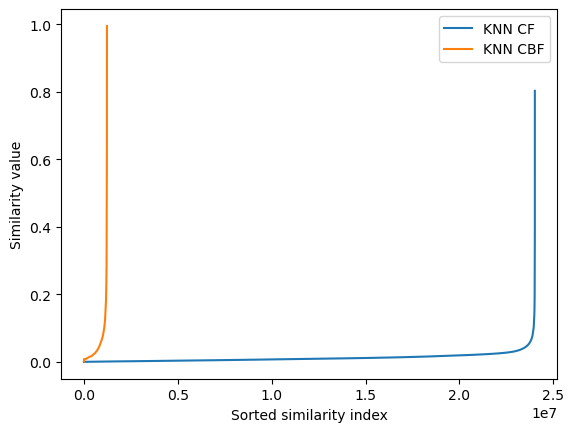

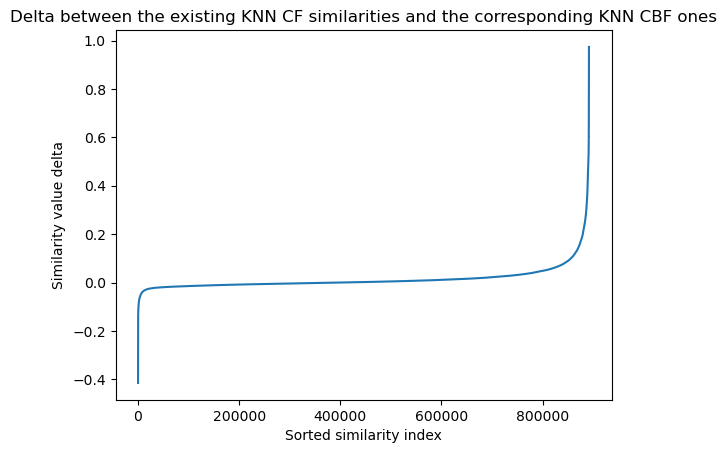

W_sparse_CF has 2.40E+07 values and 3.71 % in common with CBF
W_sparse_CBF has 1.23E+06 values and 72.78 % in common with CF
W_sparse_delta has 8.92E+05 values


In [8]:
import numpy as np
from matplotlib import pyplot
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender


itemKNNCF = ItemKNNCFRecommender(URM_train)
itemKNNCF.fit()

itemKNNCBF = ItemKNNCBFRecommender(URM_train, ICM_all)
itemKNNCBF.fit()
W_sparse_CF = itemKNNCF.W_sparse
W_sparse_CBF = itemKNNCBF.W_sparse
W_sparse_CF_sorted = np.sort(W_sparse_CF.data.copy())
W_sparse_CBF_sorted = np.sort(W_sparse_CBF.data.copy())
pyplot.plot(W_sparse_CF_sorted, label = 'KNN CF')
pyplot.plot(W_sparse_CBF_sorted, label = 'KNN CBF')
pyplot.ylabel('Similarity value')
pyplot.xlabel('Sorted similarity index')
pyplot.legend()
pyplot.show()

# Get common structure
W_sparse_CF_structure = W_sparse_CF.copy()
W_sparse_CF_structure.data = np.ones_like(W_sparse_CF_structure.data)

W_sparse_CBF_structure = W_sparse_CBF.copy()
W_sparse_CBF_structure.data = np.ones_like(W_sparse_CBF_structure.data)

W_sparse_common = W_sparse_CF_structure.multiply(W_sparse_CBF_structure)

# Get values of both in common structure of CF
W_sparse_delta = W_sparse_CBF.copy().multiply(W_sparse_common)
W_sparse_delta -= W_sparse_CF.copy().multiply(W_sparse_common)
W_sparse_delta_sorted = np.sort(W_sparse_delta.data.copy())
pyplot.plot(W_sparse_delta_sorted)
pyplot.ylabel('Similarity value delta')
pyplot.xlabel('Sorted similarity index')
pyplot.title("Delta between the existing KNN CF similarities and the corresponding KNN CBF ones")
pyplot.show()
# How many values we have in common?

print("W_sparse_CF has {:.2E} values and {:.2f} % in common with CBF".format(W_sparse_CF.nnz, W_sparse_common.nnz/W_sparse_CF.nnz*100))
print("W_sparse_CBF has {:.2E} values and {:.2f} % in common with CF".format(W_sparse_CBF.nnz, W_sparse_common.nnz/W_sparse_CBF.nnz*100))

print("W_sparse_delta has {:.2E} values".format(W_sparse_delta.nnz))

W_sparse_delta = W_sparse_delta.tocoo()


In [5]:
from Recommenders.FeatureWeighting.CFW_D_Similarity_Linalg import CFW_D_Similarity_Linalg
import Utils.Reader as Reader
from Data_manager.split_functions.split_train_validation_random_holdout import\
    split_train_in_two_percentage_global_sample
from Utils.Evaluator import EvaluatorHoldout
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender


URM_all,ICM_all=Reader.get_URM_ICM_Type(matrix_path_URM="../data/interactions_and_impressions.csv")
URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all ,train_percentage=0.80)
evaluator_validation=EvaluatorHoldout(URM_test,cutoff_list=[10])

itemKNNCF = ItemKNNCFRecommender(URM_train)
itemKNNCF.fit()
W_sparse_CF = itemKNNCF.W_sparse
CFW_weithing = CFW_D_Similarity_Linalg(URM_train, ICM_all, W_sparse_CF)
CFW_weithing.fit()
result_df, _ = evaluator_validation.evaluateRecommender(CFW_weithing)
result_df

Unique ItemID in the URM and ICM_length are 27968
Unique FeatureID in the URM are 5
EvaluatorHoldout: Ignoring 1547 ( 3.7%) Users that have less than 1 test interactions
ItemKNNCFRecommender: URM Detected 3461 (12.4%) items with no interactions.
Similarity column 27968 (100.0%), 4934.54 column/sec. Elapsed time 5.67 sec
CFW_D_Similarity_Linalg: URM Detected 3461 (12.4%) items with no interactions.
CFW_D_Similarity_Linalg: ICM Detected 4877 (17.4%) items with no features.
CFW_D_Similarity_Linalg: Generating train data
Similarity column 27968 (100.0%), 4438.46 column/sec. Elapsed time 6.30 sec
CFW_D_Similarity_Linalg: Collaborative S density: 1.50E-02, nonzero cells 11766953
CFW_D_Similarity_Linalg: Content S density: 8.85E-03, nonzero cells 6925820
CFW_D_Similarity_Linalg: Content S structure has 67379 out of 6925820 ( 1.0%) nonzero collaborative cells
CFW_D_Similarity_Linalg: Nonzero collaborative cell sum is: 1.68E+03, average is: 2.50E-02, average over all collaborative data is 2.01E

,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.000142,0.000284,0.000269,0.000045,0.000093,0.000451,0.000145,0.000186,0.001422,0.000451,...,0.962838,0.001369,0.962838,0.006393,6.461157,0.97154,0.016569,0.490032,0.05698,0.56961


In [11]:
from Recommenders.RP3betaCBFRecommender import RP3betaCBFRecommender
#4
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
import Utils.Reader as Reader

rp3betaCBF_recommender = RP3betaCBFRecommender(
    URM_train=URM_train,
    ICM_train=Reader.load_ICM_displayed(),
    verbose=False
)

rp3betaCBF_recommender.fit()
result_df, _ = evaluator_validation.evaluateRecommender(rp3betaCBF_recommender)
result_df

EvaluatorHoldout: Processed 41528 (100.0%) in 27.19 sec. Users per second: 1527


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.000547,0.000614,0.000371,0.00016,0.000176,0.001573,0.000186,0.000442,0.005442,0.001585,...,0.997574,0.005429,0.997574,0.253729,12.698157,1.000247,0.816687,1.012249,0.052313,0.225201


In [33]:
from Recommenders.FeatureCombinedImplicitALSRecommender import FeatureCombinedImplicitALSRecommender
#6
IALS_recommender = FeatureCombinedImplicitALSRecommender(
    URM_train=URM_train,
    ICM_train=ICM_all,
    verbose=True
)
IALS_recommender.fit(
    factors=500,
    regularization=0.01,
    use_gpu=False,
    iterations=94,
    num_threads=6,
    confidence_scaling=Reader.linear_scaling_confidence,
    **{
        'URM': {"alpha": 50},
        'ICM': {"alpha": 50}
    }
)
result_df, _ = evaluator_validation.evaluateRecommender(IALS_recommender)
result_df


FeatureCombinedImplicitALSRecommender: URM Detected 1 ( 0.0%) users with no interactions.


ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 27968, expected 24507.

In [37]:
from Recommenders.UserRP3betaRecommender import UserRP3betaRecommender
from Recommenders.RP3betaCBFRecommender import RP3betaCBFRecommender
#7
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
import Utils.Reader as Reader

userRp3beta_recommender = UserRP3betaRecommender(
        URM_train=ICM_combined.T,
        verbose=False
    )

userRp3beta_recommender.fit(
    )
result_df, _ = evaluator_validation.evaluateRecommender(userRp3beta_recommender)
result_df


EvaluatorHoldout: Processed 40081 (100.0%) in 26.70 sec. Users per second: 1501


,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.962814,0.0,0.962814,0.029263,9.421967,0.995665,0.065872,0.71439,2.39029,0.343082


In [9]:
#5
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender

SLIM_recommender = SLIMElasticNetRecommender(
    URM_train=ICM_combined.T,
    verbose=True
)

SLIM_recommender.fit(
    alpha=0.00026894910579512645,
    l1_ratio=0.08074126876487486,
    topK=int(400),
)
result_df, _ = evaluator_validation.evaluateRecommender(SLIM_recommender)
result_df

KeyboardInterrupt: 

# Submission Creator


In [ ]:
# SUBMITTING PREDICTION
import Utils.Writer as Writer
from Utils.Writer import NameRecommender
import Utils.Reader as Reader
#
URM_all_new=Reader.load_URM("../output/out_10.csv",values_to_replace={0.01: 0.0})
#URM_all_original=Reader.read_train_csr()
submit= Writer.Writer(NameRecommender=NameRecommender.USER_ITEM, URM=URM_all_new)
submit.makeSubmission()

In [ ]:
from Recommenders.GeneralizedMergedHybridRecommender import GeneralizedMergedHybridRecommender

higher_recommender = GeneralizedMergedHybridRecommender(
    URM_train=URM_train,
    recommenders=[
        rp3betaCBF_recommender,
        userRp3beta_recommender
    ],
    verbose=False
)
higher_recommender.fit(
    alphas=[
        0.4443439790958872 ,
        1 - 0.4443439790958872
    ]
)

result_df, _ = evaluator_validation.evaluateRecommender(higher_recommender)
result_df

/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:276: RuntimeWarning: overflow encountered in power
  return np.sum(np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)),
/Users/fasa/PycharmProjects/RecSys-Challenge-2022-Polimi/Utils/metrics.py:270: RuntimeWarning: invalid value encountered in double_scalars
  ndcg_ = rank_dcg / ideal_dcg
